# **TASK 10**  **Translator for Advertisements (Multimodal → Text)**

Comprehensive Task Handbook

# Problem Statement
Current Challenges in Advertisement Translation

**1.Manual Translation Delays**

*  Ad translations require human translators
*  Slow turnaround for multi-language campaigns
*  Increased cost for repeated translations

**2.Inconsistent Marketing Tone**

*  Literal translations lose brand intent
*  Tone mismatch across regions
*  Reduced campaign effectiveness

**3.Limited Multimodal Support**

*  Ads exist in text, image, and audio formats
*  Manual handling of each format is inefficient
*  No unified translation workflow

**4.Scalability Issues**


*  Difficult to scale for global audiences
*  High effort for regional customization
*  Delays during peak campaign launches

# **AI Models and Modalities**
Model Architecture Overview
| **Task**                   | **Modality Required**       | **Model Used** | **Provider**          | **Rationale**                                           |
| -------------------------- | --------------------------- | -------------- | --------------------- | ------------------------------------------------------- |
| Ad Text Translation        | Natural Language Processing | gpt-4.1-nano   | OpenAI (via Nexus AI) | Fast and accurate translation of advertisement text     |
| Image-Based Ad Translation | Image → Text → NLP          | gpt-4.1-nano   | OpenAI (via Nexus AI) | Translates OCR-extracted text from advertisement images |
| Audio Transcription        | Audio → Text                | whisper-1      | OpenAI (via Nexus AI) | Converts spoken advertisement audio into readable text  |
| Audio-Based Ad Translation | Text → NLP                  | gpt-4.1-nano   | OpenAI (via Nexus AI) | Translates transcribed advertisement content            |
| Tone Preservation          | Natural Language Processing | gpt-4.1-nano   | OpenAI (via Nexus AI) | Maintains marketing intent, clarity, and brand tone     |



# **Data Flow Architecture**
**1. Input Processing**

*  Text ads are directly processed
*  Image ads → OCR text extraction
*  Audio ads → Speech-to-text conversion
*  All inputs normalized into text format

**2. AI Processing Pipeline**

*  Translated using prompt-engineered instructions
*  Tone and intent preservation enforced
*  Language adaptation for regional relevance

**3. Decision Engine**

*  Ensures clarity and marketing suitability
*  Avoids literal word-by-word translation
*  Maintains consistency across formats

**4. Output Generation**

*  Clean translated advertisement text
*  Ready for campaigns and promotions
*  Reusable across platforms and regions


# **Workflow:**
**1. Input Normalization**
Advertisement content is received in:

*  Text form
*  Image-derived text (OCR)
*  Audio-derived text (speech-to-text)

 All inputs are converted into a standard text format.

**2. Model Prompting**
The model is instructed to:

*  Translate advertisement content into the target language
*  Preserve promotional tone and clarity
*  Adapt wording for cultural relevance
*  Avoid literal translations

**3. Model Response**
The translated output is:

*  Stored as translated_ad_text
*  Displayed to the user
*  Ready for immediate marketing use

This showcases multimodal capability (audio + image + text → text) using the Nexus API.

In [ ]:
# Import OpenAI SDK for Nexus API access
import openai

In [ ]:
# Initialize Nexus client with API key and base URL
client = openai.OpenAI(
    api_key="Your API KEY",
    base_url="https://apidev.navigatelabsai.com/"
)

# **Text-Based Advertisement Translation**
(Text → Text)

In [ ]:
# Translate text-based advertisement content
response_text = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You are a professional marketing translator."},
        {"role": "user", "content": "Translate this ad into Tamil: Fresh taste, better life."}
    ],
    temperature=0.4,
    top_p=0.9,
    max_tokens=10,
    stream=False
)

print("TEXT INPUT TRANSLATION:\n")
print(response_text.choices[0].message.content)

TEXT INPUT TRANSLATION:

புதிய சுவை, சிறந்த வாழ்க்கை


# **Image-Based Advertisement Translation**
(Image → Text → Translation)

Upload advertisement image


Saving istockphoto-1451723277-612x612.jpg to istockphoto-1451723277-612x612 (1).jpg


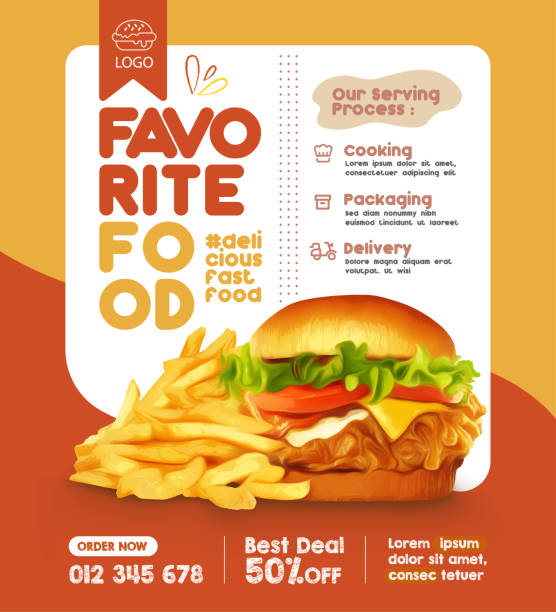


IMAGE-BASED AD TRANSLATION:

The advertisement text extracted from the image and translated into English is:

---

**FAVORITE FOOD**


In [ ]:
import openai
import base64
from google.colab import files
from IPython.display import display
from PIL import Image
import io

# -------------------------------
# API CONFIGURATION
# -------------------------------
client = openai.OpenAI(
    api_key="Your API KEY",
    base_url="https://apidev.navigatelabsai.com"
)

# -------------------------------
# UPLOAD IMAGE FILE
# -------------------------------
print("Upload advertisement image")
uploaded = files.upload()
image_file = list(uploaded.keys())[0]

# Display uploaded image
display(Image.open(image_file))

# -------------------------------
# ENCODE IMAGE TO BASE64
# -------------------------------
with open(image_file, "rb") as img:
    image_bytes = img.read()

image_base64 = base64.b64encode(image_bytes).decode("utf-8")

# -------------------------------
# IMAGE → TEXT → TRANSLATION
# -------------------------------
response = client.chat.completions.create(
    model="gpt-4.1-nano",  # lightweight and reliable
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "Extract the advertisement text from this image and translate it into English."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/png;base64,{image_base64}"
                    }
                }
            ]
        }
    ],
    temperature=0.4,
    max_tokens=20
)

print("\nIMAGE-BASED AD TRANSLATION:\n")
print(response.choices[0].message.content)


# **Audio-Based Advertisement Translation**
(Audio → Text → Translation)

In [ ]:
from openai import OpenAI
from google.colab import files
import subprocess

# -------------------------------
# API CONFIGURATION
# -------------------------------
client = OpenAI(
    api_key="Your API KEY",
    base_url="https://apidev.navigatelabsai.com"
)

# -------------------------------
# UPLOAD AUDIO FILE
# -------------------------------
print("/content/sample-3s.mp3")
uploaded = files.upload()
input_audio = list(uploaded.keys())[0]

# -------------------------------
# CONVERT AUDIO FOR WHISPER
# -------------------------------
converted_audio = "converted_whisper.wav"
subprocess.run([
    "ffmpeg", "-y",
    "-i", input_audio,
    "-ar", "16000",
    "-ac", "1",
    "-c:a", "pcm_s16le",
    converted_audio
])

# -------------------------------
# AUDIO → TEXT (WHISPER)
# -------------------------------
with open(converted_audio, "rb") as audio_file:
    transcript = client.audio.transcriptions.create(
        model="whisper-1",
        file=audio_file
    )

audio_text = transcript.text
print("\nTRANSCRIBED TEXT:\n", audio_text)

# -------------------------------
# TEXT → TRANSLATION
# -------------------------------
translation = client.chat.completions.create(
    model="gpt-4.1-nano",
    messages=[
        {"role": "system", "content": "You are a professional marketing translator."},
        {"role": "user", "content": f"Translate this advertisement into Telugu: {audio_text}"}
    ],
    temperature=0.4,
    max_tokens=10
)

print("\nTRANSLATED ADVERTISEMENT:\n")
print(translation.choices[0].message.content)


/content/sample-3s.mp3


Saving sample-3s.mp3 to sample-3s (2).mp3

TRANSCRIBED TEXT:
 You

TRANSLATED ADVERTISEMENT:

మీ
